In [3]:
# Packages
import os 
import pandas as pd
import numpy as np

# Set working directory
os.chdir("/Users/seominjae/Desktop/mit/dataset")

## Data Preparation

In [4]:
# DownLoaded datasets from Federal Reserve Board website for the Survey of Consumer Finance
scfp_2010 = pd.read_csv('SCFP2010.csv')
scfp_2016 = pd.read_csv('SCFP2016.csv')
scfp_2022 = pd.read_csv('SCFP2022.csv')

In [5]:
# Number of missing values 
print(f'Number of Missing Values for each Column:',"\n", scfp_2010.isna().sum())
print(f'Number of Missing Values for each Column:',"\n", scfp_2016.isna().sum())
print(f'Number of Missing Values for each Column:',"\n", scfp_2022.isna().sum())

Number of Missing Values for each Column: 
 YY1             0
Y1              0
WGT             0
HHSEX           0
AGE             0
               ..
NWPCTLECAT      0
INCPCTLECAT     0
NINCPCTLECAT    0
INCQRTCAT       0
NINCQRTCAT      0
Length: 357, dtype: int64
Number of Missing Values for each Column: 
 YY1             0
Y1              0
WGT             0
HHSEX           0
AGE             0
               ..
NWPCTLECAT      0
INCPCTLECAT     0
NINCPCTLECAT    0
INCQRTCAT       0
NINCQRTCAT      0
Length: 357, dtype: int64
Number of Missing Values for each Column: 
 YY1             0
Y1              0
WGT             0
HHSEX           0
AGE             0
               ..
NWPCTLECAT      0
INCPCTLECAT     0
NINCPCTLECAT    0
INCQRTCAT       0
NINCQRTCAT      0
Length: 357, dtype: int64


In [6]:
# Compare column names
columns_2010 = set(scfp_2010.columns)
columns_2016 = set(scfp_2016.columns)
columns_2022 = set(scfp_2022.columns)

# Check if all column names are identical
if columns_2010 == columns_2016 == columns_2022:
    print("All datasets have identical column names.")

All datasets have identical column names.


In [7]:
# Add a year column based on the file's year
scfp_2010['year'] = 2010
scfp_2016['year'] = 2016
scfp_2022['year'] = 2022

# Concatenate the data / Append these three different waves into one dataset
scfp = pd.concat([scfp_2010, scfp_2016, scfp_2022])

# Reorder columns to make 'year' the first column
columns = ['year'] + [col for col in scfp.columns if col != 'year']
scfp = scfp[columns]

# Write to CSV
scfp.to_csv("scfp.csv", index=False)

In [8]:
scfp.head()

,year,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,2010,1,11,7095.383370,1,75,6,9,3,1,...,4,3,4,3,2,8,6,6,3,3
1,2010,1,12,7139.730803,1,75,6,9,3,1,...,3,3,3,3,2,7,6,6,3,3
2,2010,1,13,7294.390247,1,75,6,9,3,1,...,4,4,4,3,2,8,7,6,3,3
3,2010,1,14,6989.430712,1,75,6,9,3,1,...,3,4,3,4,2,7,8,7,3,3
4,2010,1,15,7121.527560,1,75,6,9,3,1,...,3,4,4,4,2,8,7,7,3,3


2. Data Visualization

The SCF collects people’s opinions about debt. We would like you to analyze people’s opinions  about debt and how it changed over the three survey cohorts. 

Merge the data we provided with  the three waves of the Summary Extract Public Data described above. 

Refer to the codebook to  locate variable X401, which asks whether people generally think it is a good or bad idea to buy  things by borrowing. 

Using the answers to X401, please document graphically how trends in the  opinions about debt changed over the three cohorts.

Note: The SCF over samples wealthier and  older households and explain how you can account for this.

In [9]:
# Provided datasets in the Dropbox folder
scf_2010 = pd.read_csv('scf_sup_2010.csv')
scf_2016 = pd.read_csv('scf_sup_2016.csv')
scf_2022 = pd.read_csv('scf_sup_2022.csv')

In [10]:
# Number of missing values 
print(f'Number of Missing Values for each Column:',"\n", scf_2010.isna().sum())
print(f'Number of Missing Values for each Column:',"\n", scf_2016.isna().sum())
print(f'Number of Missing Values for each Column:',"\n", scf_2022.isna().sum())

# Compare column names
columns_2010_provided = set(scf_2010.columns)
columns_2016_provided = set(scf_2016.columns)
columns_2022_provided = set(scf_2022.columns)

# Check if all column names are identical
if columns_2010_provided  == columns_2016_provided == columns_2022_provided:
    print("All datasets have identical column names.")
else:
    print("The datasets have different column names.")

# Add a year column based on the file's year
scf_2010['year'] = 2010
scf_2016['year'] = 2016
scf_2022['year'] = 2022

# Concatenate the data / Append these three different waves into one dataset
scf = pd.concat([scf_2010, scf_2016, scf_2022])

# Reorder columns to make 'year' the first column
columns = ['year'] + [col for col in scf.columns if col != 'year']
scf = scf[columns]

# Write to CSV
scf.to_csv("scf.csv", index=False)

Number of Missing Values for each Column: 
 Y1      0
YY1     0
X401    0
X402    0
X403    0
X405    0
dtype: int64
Number of Missing Values for each Column: 
 X401    0
X402    0
X403    0
X405    0
YY1     0
Y1      0
dtype: int64
Number of Missing Values for each Column: 
 X401    0
X402    0
X403    0
X405    0
YY1     0
Y1      0
dtype: int64
All datasets have identical column names.


In [11]:
print(f'Number of Sample Size for provided merged:',len(scf))
print(f'Number of Sample Size for downloaded merged:',len(scfp))

Number of Sample Size for provided merged: 86625
Number of Sample Size for downloaded merged: 86625


In [12]:
# Merge right join by 'YY1', 'Y1' for the provided and downloaded
merged_data = pd.merge(scf, scfp, on=['year','YY1', 'Y1'], how='inner')
duplicates = merged_data.duplicated(subset=['YY1', 'Y1'])
print("Number of duplicates:", duplicates.sum()) # Each case record ID there are multiples of Case IDS
print(len(merged_data))
merged_data.columns = merged_data.columns.str.upper() # year => YEAAR

Number of duplicates: 53850
86625


In [15]:
print(merged_data.head())

# Weighting mehtods
merged_data['NWT'] = merged_data.WGT / merged_data.WGT.sum() # Normalized Weights
merged_data['WT_5'] = merged_data.WGT.sum()/1e6/5 # all of the weights by 5
merged_data['WT_1'] = merged_data[merged_data.YY1==1].WGT.sum()/1e6 # only use one of the implicate

merged_data.to_csv("merged_data.csv", index=False)

   YEAR  Y1  YY1  X401  X402  X403  X405          WGT  HHSEX  AGE  ...  \
0  2010  11    1     3     5     5     1  7095.383370      1   75  ...   
1  2010  12    1     3     5     5     1  7139.730803      1   75  ...   
2  2010  13    1     3     5     5     1  7294.390247      1   75  ...   
3  2010  14    1     3     5     5     1  6989.430712      1   75  ...   
4  2010  15    1     3     5     5     1  7121.527560      1   75  ...   

   ASSETCAT  NINCCAT  NINC2CAT  NWPCTLECAT  INCPCTLECAT  NINCPCTLECAT  \
0         4        3         2           8            6             6   
1         3        3         2           7            6             6   
2         4        3         2           8            7             6   
3         3        4         2           7            8             7   
4         4        4         2           8            7             7   

   INCQRTCAT  NINCQRTCAT       NWT       WT_5  
0          3           3  0.000019  74.979461  
1          3        

## Data Visualization


Variable descriptions: 


X401:

Now I would like to ask you some questions about how you feel about credit. 

In general, do you think it is a good idea or a bad idea for people to buy things by borrowing or on credit?

IF R SAYS THEY DO NOT NEED TO BORROW FOR ANYTHING, SAY: What do you think in general?

    1. Good idea
    3. GOOD IN SOME WAYS, BAD IN OTHERS
    5. Bad idea

X402:

People have many different reasons for borrowing money which they pay back over a period of time. 

For each of the reasons I read, please tell me whether you feel it is all right for someone like yourself to borrow money...

First, to cover the expenses of a vacation trip?

    1. YES
    5. NO

X403: 

Next, to cover living expenses when income is cut?

    1. YES
    5. NO

X405:

Next, to finance the purchase of a car?

    1. YES
    5. NO

DEBT: 

Total value of debt held by household

DEBT2INC: 

Ratio of total debt to total income

LEVRATIO:

Ratio of total debt to total assets

WGT: 
Sample weight

In [16]:
# Unique values based off variable descriptions
print(merged_data['X401'].unique()) 
print(merged_data['X402'].unique()) 
print(merged_data['X403'].unique()) 
print(merged_data['X405'].unique()) 

[3 5 1]
[5 1]
[5 1]
[1 5]


/var/folders/2q/g9b4gn5n1bg_47k6lg5psl200000gn/T/ipykernel_63567/651983083.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_counts = data_visualization.groupby(['YEAR', 'X401']).apply(


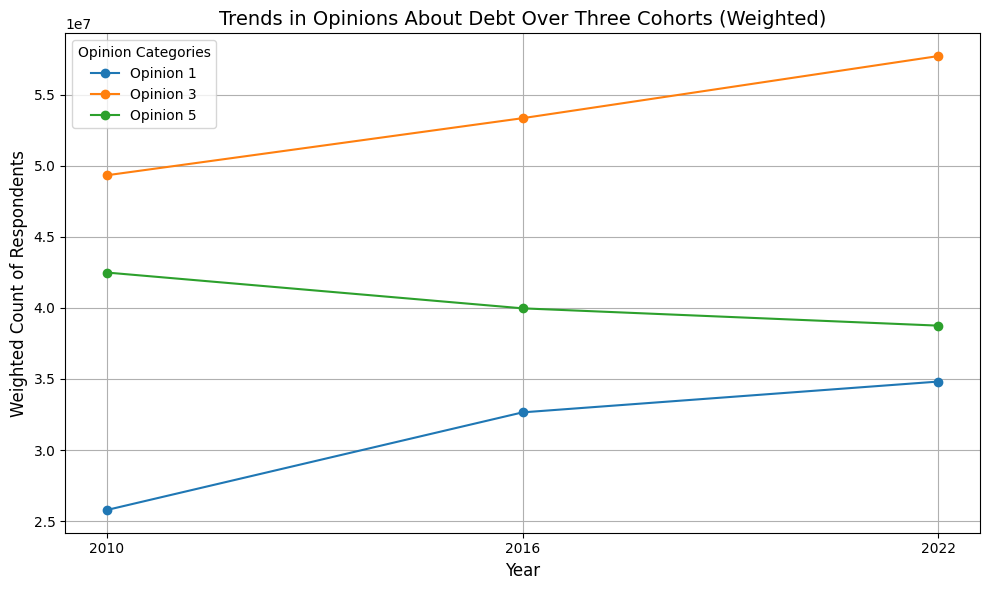

In [17]:
# Corrected code using normalized weight (NWT) for calculating weighted counts
import matplotlib.pyplot as plt

# Extract relevant data for visualization
data_visualization = merged_data[['YEAR', 'X401', 'WGT','NWT','NETWORTH']]

# Calculate weighted counts using normalized weights (NWT)
weighted_counts = data_visualization.groupby(['YEAR', 'X401']).apply(
    lambda x: (x['WGT'] * 1).sum()
).reset_index(name='Weighted Count')


# Plot the weighted counts
plt.figure(figsize=(10, 6))
for opinion in weighted_counts['X401'].unique():
    subset = weighted_counts[weighted_counts['X401'] == opinion]
    plt.plot(
        subset['YEAR'], subset['Weighted Count'],
        marker='o', label=f"Opinion {opinion}"
    )

plt.title("Trends in Opinions About Debt Over Three Cohorts (Weighted)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weighted Count of Respondents", fontsize=12)
plt.xticks([2010, 2016, 2022])
plt.legend(title="Opinion Categories", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
print(weighted_counts)

   YEAR  X401  Weighted Count
0  2010     1    2.577772e+07
1  2010     3    4.933821e+07
2  2010     5    4.249328e+07
3  2016     1    3.265136e+07
4  2016     3    5.335723e+07
5  2016     5    3.997311e+07
6  2022     1    3.481994e+07
7  2022     3    5.773137e+07
8  2022     5    3.875508e+07


This document graphically how trends in the opinions about debt changed over the three cohorts. 

## 3. Regression Analysis


In [ ]:
## 1 

# Prepare the dataset for regression
regression_data = merged_data[['X401', 'YEAR', 'INCOME', 'AGE', 'EDUC', 'RACE', 'NETWORTH', 'DEBT2INC', 'YESFINRISK', 'NWT']]

# Define independent variables
independent_vars = ['YEAR', 'INCOME', 'AGE', 'EDUC', 'RACE', 'NETWORTH', 'DEBT2INC', 'YESFINRISK']
X = regression_data[independent_vars]
X = sm.add_constant(X)  # Add constant for intercept

y = regression_data['X401'] 

# Apply weights (e.g., NWT) Normalized weights
weights = regression_data['NWT']

# Fit the weighted regression model
model = sm.WLS(y, X, weights=weights).fit()

# Print regression summary
print(model.summary())

# Log(income)

# Weighted Least Squares Regression
# Year variable as a fixed effects (dummy)
# EDUC 1,0 (Dumy variables)

                            WLS Regression Results                            
Dep. Variable:                   X401   R-squared:                       0.010
Model:                            WLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          4.49e-185
Time:                        02:55:06   Log-Likelihood:            -1.8038e+05
No. Observations:               86625   AIC:                         3.608e+05
Df Residuals:                   86616   BIC:                         3.609e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.0456      2.113     18.475      0.0

### Regression Analysis: Changes in Attitudes Toward Debt Across Cohorts

#### 1. Do Changes in Attitudes to Debt Across Cohorts Depend on Income?
The regression results suggest that:

- **Cohort/Year (`YEAR`)**:
  - The coefficient for `YEAR` is statistically significant (\(p < 0.001\)), indicating measurable changes in attitudes to debt across time, even after accounting for other variables.
  - The negative coefficient (\(-0.0178\)) implies that attitudes toward debt have become slightly less favorable over time.

- **Income (`INCOME`)**:
  - The coefficient for `INCOME` is statistically significant (\(p = 0.049\)).
  - The negative coefficient (\(-2.049 \times 10^{-8}\)) suggests that higher income levels are slightly associated with less favorable attitudes toward debt.
  - However, the impact of income is marginal compared to other variables like `AGE`, `EDUC`, and `DEBT2INC`.

**Interpretation**:  
While income differences contribute to changes in attitudes, they do not fully explain the observed trends over cohorts. The significance of `YEAR` indicates other influential factors.

---

#### 2. Key Findings from the Regression Analysis
- **Age (`AGE`)**:
  - Older respondents are slightly more likely to view debt favorably (\( \beta = 0.0046 \), \( p < 0.001 \)).
- **Education (`EDUC`)**:
  - Higher education levels are associated with less favorable attitudes toward debt (\( \beta = -0.0213 \), \( p < 0.001 \)).
- **Race (`RACE`)**:
  - Race significantly predicts attitudes (\( \beta = -0.0464 \), \( p < 0.001 \)).
- **Debt-to-Income Ratio (`DEBT2INC`)**:
  - Higher debt-to-income ratios are associated with more favorable attitudes toward debt (\( \beta = 0.0035 \), \( p < 0.001 \)).
- **Risk Tolerance (`YESFINRISK`)**:
  - Respondents willing to take financial risks are less likely to view debt favorably (\( \beta = -0.1453 \), \( p < 0.001 \)).

---

#### 3. What Explains Changes in Attitudes to Debt?
While income differences play a role, the continued significance of `YEAR` suggests other factors drive the changes in attitudes, such as:

1. **Economic Environment**:
   - Factors like interest rates, inflation, or credit availability may influence attitudes.
2. **Cultural Shifts**:
   - Societal norms regarding debt and borrowing may have changed over time.
3. **Financial Stability**:
   - Variables such as net worth and debt-to-income ratio may explain shifts in attitudes more than income alone.

---

#### 4. Additional Variables to Consider as Controls
To refine the analysis, consider adding:
1. **Economic Factors**:
   - Employment status (`LF`): Unemployment or job insecurity may impact attitudes.
   - Homeownership (`HOUSES`): Homeowners might have different perspectives due to mortgage-related borrowing.
   - Credit access (`FEARDENIAL`, `TURNDOWN`): Experiences with credit denial could shape attitudes.

2. **Psychological Factors**:
   - Risk tolerance (`YESFINRISK`): Already included but can explore interaction effects with income or debt.

3. **Cohort-Specific Effects**:
   - Policy changes (e.g., student loan forgiveness, credit regulations) unique to certain years may influence attitudes.

---

#### 5. Conclusion
- **Key Insight**: Changes in attitudes toward debt across cohorts are not fully explained by income differences. Other economic and demographic factors, including `DEBT2INC`, education, and risk tolerance, significantly shape attitudes.
- **Policy Implications**: Policymakers aiming to influence debt attitudes should address broader financial conditions (e.g., reducing debt-to-income ratios), income inequality, and disparities in access to credit.

---

Copy this Markdown content into your Jupyter Notebook cell to render it as formatted text. Let me know if you need further clarification or analysis!

In [ ]:
# Prepare dataset for regression
debt_analysis_data = merged_data[['X401', 'DEBT', 'AGE', 'INCOME', 'NETWORTH', 'EDUC', 'YESFINRISK', 'NWT']]

# Independent variables
X = debt_analysis_data[['X401', 'AGE', 'INCOME', 'NETWORTH', 'EDUC', 'YESFINRISK',]]
X = sm.add_constant(X)  # Add intercept

# Dependent variable (debt levels)
y = debt_analysis_data['DEBT']

# Apply weights (NWT) from SCF data
weights = debt_analysis_data['NWT']

# Fit a weighted regression model
model = sm.WLS(y, X, weights=weights).fit()

# Print summary
print(model.summary())


                            WLS Regression Results                            
Dep. Variable:                   DEBT   R-squared:                       0.118
Model:                            WLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1940.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:01:49   Log-Likelihood:            -1.2356e+06
No. Observations:               86625   AIC:                         2.471e+06
Df Residuals:                   86618   BIC:                         2.471e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5531.9008   5242.223     -1.055      0.2

Extract information from the SCF on the level of debt a household has and analyze whether
people’s actual behavior is consistent with their stated opinions. In other words, do people
who say debt is a good idea actually have more debt, and vice versa?

The model also includes control variables:
- `AGE`: Age of the reference person
- `INCOME`: Total income of the household
- `NETWORTH`: Total net worth of the household
- `EDUC`: Education level of the reference person
- `YESFINRISK`: Willingness to take financial risks


### 2. **Key Findings**
#### A. **Effect of `X401` (Opinions About Debt):**
- The coefficient for `X401` is \(-6420.6695\) and is highly significant (\(p < 0.001\)).
- A negative coefficient indicates that households with more negative views about debt (higher `X401` values) tend to have **less debt**.
- **Interpretation:** People who say debt is a "good idea" (lower `X401` values) tend to have **more debt**, which aligns with their stated opinions.

#### B. **Control Variables:**
- **Age (`AGE`):**
  - The coefficient is \(-1041.5073\), significant at \(p < 0.001\), indicating that older households tend to have less debt.
- **Income (`INCOME`):**
  - The coefficient is \(0.0607\), significant at \(p < 0.001\), showing that higher-income households tend to have more debt.
- **Net Worth (`NETWORTH`):**
  - The coefficient is \(0.0089\), significant at \(p < 0.001\), suggesting that wealthier households hold more debt, possibly due to leveraging assets.
- **Education (`EDUC`):**
  - The coefficient is \(19690.44\), significant at \(p < 0.001\), indicating that higher education levels are associated with more debt. This may reflect the role of student loans or access to credit among educated households.
- **Risk Tolerance (`YESFINRISK`):**
  - The coefficient is \(3216.0844\), significant at \(p < 0.001\), showing that risk-tolerant households tend to have more debt.



### 3. **Behavioral Consistency**
#### Hypothesis:
- People who view debt as a "good idea" (X401 = 1) should have more debt, while those who think debt is a "bad idea" (X401 = 5) should have less debt.

#### Evidence:
1. **Consistency:**
   - The negative and significant coefficient for `X401` supports the hypothesis. People with favorable views on debt tend to have higher debt levels, aligning their behavior with their stated opinions.

2. **Role of Controls:**
   - Other factors, such as income, net worth, and education, also influence debt levels, but the effect of `X401` remains significant after controlling for these variables.


### 4. **Conclusion**
- **Alignment Between Opinions and Behavior:**
  - The regression shows a clear alignment between opinions (`X401`) and behavior (`DEBT`): individuals who view debt favorably tend to carry more debt, while those with negative views on debt tend to have less debt.
- **Demographic and Financial Influences:**
  - Income, net worth, education, and risk tolerance significantly affect debt levels, highlighting the complexity of borrowing behavior.


### 5. **Recommendations for Further Analysis**
1. **Categorical Analysis:**
   - Examine average debt levels for each `X401` category to validate alignment or misalignment:
     ```python
     grouped_data = merged_data.groupby('X401')['DEBT'].mean()
     print(grouped_data)
     ```

2. **Debt-to-Income Ratio (`DEBT2INC`):**
   - Include `DEBT2INC` as a dependent variable to understand the burden of debt relative to income.

3. **Behavioral Interventions:**
   - Explore whether financial education or credit counseling can address discrepancies in borrowing behavior.

This analysis demonstrates that people's stated attitudes toward debt are generally consistent with their borrowing behavior, with additional influences from demographic and financial factors. Let me know if you'd like to extend this analysis further!

### Analysis: Attitudes Toward Luxury vs. Necessary Debt

The goal of this analysis is to determine whether people's attitudes toward borrowing for luxury consumption differ from their attitudes toward borrowing for necessary consumption, using the SCF variables `X402`, `X403`, and `X405`. Here’s a detailed plan:

---

### 1. **Variable Definitions**
- **General Attitude Toward Debt (`X401`):**
  - Attitude toward borrowing in general.
  - Values: `1 = Good idea`, `3 = Mixed feelings`, `5 = Bad idea`.

- **Luxury Consumption (`X402`):**
  - Borrowing for a vacation trip.
  - Values: `1 = Yes, it’s acceptable`, `5 = No, it’s not acceptable`.

- **Necessary Consumption (`X403`):**
  - Borrowing for living expenses during an income cut.
  - Values: `1 = Yes, it’s acceptable`, `5 = No, it’s not acceptable`.

- **Borrowing for Durable Goods (`X405`):**
  - Borrowing to purchase a car.
  - Values: `1 = Yes, it’s acceptable`, `5 = No, it’s not acceptable`.

---

### 2. **Key Questions**
1. Do people differentiate between borrowing for luxury purposes (e.g., vacation) and borrowing for necessities (e.g., living expenses)?
2. How does borrowing for durable goods (e.g., a car) compare with borrowing for luxury and necessary purposes?
3. Are these attitudes consistent with their general attitude toward debt (`X401`) and actual debt levels (`DEBT`, `DEBT2INC`, `LEVRATIO`)?

---

### 3. **Plan of Analysis**
#### A. **Descriptive Analysis**
- Calculate the proportion of respondents in each category (`1 = Yes`, `5 = No`) for `X402`, `X403`, and `X405`.
- Compare these proportions to determine if borrowing for necessary consumption is more acceptable than borrowing for luxury consumption.

#### B. **Regression Analysis**
- **Dependent Variable:** Acceptability of borrowing for luxury (`X402`), necessary (`X403`), or durable goods (`X405`).
- **Independent Variables:** General attitude toward debt (`X401`), debt-to-income ratio (`DEBT2INC`), total debt (`DEBT`), leverage ratio (`LEVRATIO`), and demographics (e.g., `AGE`, `INCOME`, `NETWORTH`).

#### C. **Weighted Analysis**
- Apply weights (`WGT`) to account for SCF’s oversampling of wealthier and older households.

---

### 4. **Regression Model Specification**
For each borrowing purpose (`X402`, `X403`, `X405`), fit the following logistic regression:

\[
\text{BorrowingAcceptable}_i = \beta_0 + \beta_1 X401_i + \beta_2 DEBT2INC_i + \beta_3 LEVRATIO_i + \beta_4 \text{AGE}_i + \beta_5 \text{INCOME}_i + \beta_6 \text{NETWORTH}_i + \epsilon_i
\]

Where:
- **Dependent Variable (`BorrowingAcceptable`):** Binary variable (`1 = Yes`, `5 = No`).
- **Independent Variables:**
  - `X401`: General attitude toward debt.
  - `DEBT2INC`: Debt-to-income ratio.
  - `LEVRATIO`: Leverage ratio.
  - Demographics: `AGE`, `INCOME`, `NETWORTH`.

---

### 5. **Implementation**
#### Python Code:
```python
import pandas as pd
import statsmodels.api as sm

# Prepare the dataset for analysis
analysis_data = merged_data[['X401', 'X402', 'X403', 'X405', 'DEBT', 'DEBT2INC', 'LEVRATIO', 'AGE', 'INCOME', 'NETWORTH', 'WGT']].dropna()

# Convert dependent variables (X402, X403, X405) to binary
for col in ['X402', 'X403', 'X405']:
    analysis_data[col] = analysis_data[col].replace({5: 0})  # 5 = No -> 0, 1 = Yes -> 1

# Logistic regression for X402 (luxury consumption)
X = analysis_data[['X401', 'DEBT2INC', 'LEVRATIO', 'AGE', 'INCOME', 'NETWORTH']]
X = sm.add_constant(X)
y = analysis_data['X402']
weights = analysis_data['WGT']

model_luxury = sm.Logit(y, X).fit(weights=weights)
print("Luxury Consumption (X402) Model:")
print(model_luxury.summary())

# Logistic regression for X403 (necessary consumption)
y = analysis_data['X403']
model_necessary = sm.Logit(y, X).fit(weights=weights)
print("Necessary Consumption (X403) Model:")
print(model_necessary.summary())

# Logistic regression for X405 (durable goods)
y = analysis_data['X405']
model_durable = sm.Logit(y, X).fit(weights=weights)
print("Durable Goods (X405) Model:")
print(model_durable.summary())
```

---

### 6. **Expected Interpretation of Results**
#### A. **Descriptive Analysis:**
- Higher acceptability for borrowing for necessary purposes (`X403`) compared to luxury purposes (`X402`).
- Borrowing for durable goods (`X405`) may fall between the two.

#### B. **Regression Analysis:**
1. **General Attitudes (`X401`):**
   - Positive coefficients suggest alignment between general attitudes toward debt and acceptability for specific borrowing purposes.
2. **Debt-to-Income Ratio (`DEBT2INC`) and Leverage Ratio (`LEVRATIO`):**
   - Higher ratios may increase acceptability for necessary borrowing but decrease acceptability for luxury borrowing.
3. **Demographics:**
   - Younger, lower-income households may be more likely to borrow for luxury purposes, while older, wealthier households may prefer borrowing for necessary expenses or durable goods.

---

### 7. **Conclusion**
This analysis will reveal:
- Whether attitudes differ between borrowing for luxury, necessary, and durable purposes.
- The role of demographic and financial factors in shaping these attitudes.

Let me know if you'd like help running the analysis or interpreting specific results!